## Introdução a Machine Learning

### Importação das bibliotecas

In [1]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

### Importando o Dataset


In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
df = pd.read_csv(uri)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
colunas = {
    'mileage_per_year': "milhas_por_ano",
    'model_year': "ano_do_modelo",
    'price': "preco",
    'sold': "vendido"

}

df = df.rename(columns=colunas)
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
troca = {
    'yes':1,
    'no':0
}

df['vendido'] = df['vendido'].map(troca)
df.tail()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1
9999,9999,12362,1999,87945.73,0


In [5]:
ano_atual = datetime.today().year
df['idade_do_modelo'] = ano_atual - df['ano_do_modelo']
df['km_por_ano'] = df['milhas_por_ano'] * 1.60934
df.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [6]:
df.drop(['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1, inplace=True)
df.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


## Criando modelo de predição com Decision Tree:

In [11]:
x = df[['preco','idade_do_modelo','km_por_ano']]
y = df['vendido']

x

,preco,idade_do_modelo,km_por_ano
0,30941.02,24,35085.22134
1,40557.96,26,12622.05362
2,89627.50,18,11440.79806
3,95276.14,9,43167.32682
4,117384.68,10,12770.11290
...,...,...,...
9995,97112.86,18,25060.64248
9996,107424.63,22,21317.31764
9997,93856.99,10,20950.38812
9998,51250.57,13,16840.13376


In [8]:
# determinando a seed do random state para não termos resultados diferentes
SEED = 5
np.random.seed(SEED)

# definindo as variaveis de treino e teste do modelo
raw_train_x, raw_test_x, train_y, teste_y = train_test_split(x, y, 
                                                     test_size=0.25,
                                                     stratify = y
                                                    )
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(raw_train_x), (len(raw_test_x))))

# criando o modelo
model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_train_x, train_y)

# realizando previsões
previsoes = model.predict(raw_test_x)

# medindo a taxa de acerto do modelo
acuracia = accuracy_score(previsoes, teste_y)
print(f'Taxa de acerto: {acuracia:.2%}')

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Taxa de acerto: 79.28%


In [9]:
valores = {
    'preco':  60000.075,
    'idade_do_modelo':  15,
    'km_por_ano':  12725.12410
} 
teste = pd.DataFrame(valores, columns=valores.keys(), index=[0])

model.predict(teste)

array([0], dtype=int64)

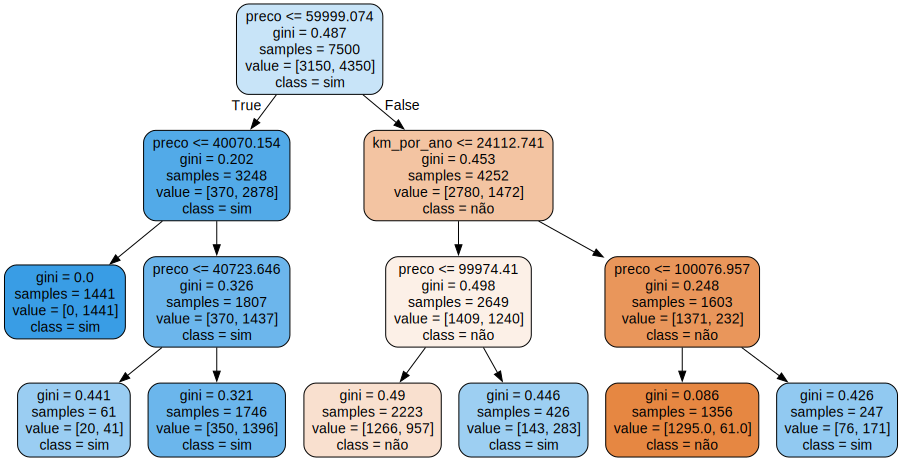

In [10]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, 
                           out_file=None,
                           filled=True, rounded=True,
                           feature_names=features,
                           class_names=["não","sim"]
                        )
grafico = graphviz.Source(dot_data)
grafico